# Using the data from SQL Results to analyze taxi data and make recommendations for a new ride share company

In [1]:
import pandas as pd            # For data analysis
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns           # Optional, for prettier plots

In [2]:
df1 = pd.read_csv('/app/moved_project_sql_result_01.csv')
df2 = pd.read_csv('/app/moved_project_sql_result_04.csv')

In [3]:
print("DF1 preview:")
df1.head()

DF1 preview:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
print("\nDF2 preview:")
df2.head()


DF2 preview:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
print("DF1 info:")
print(df1.info())

print("\nDF2 info:")
print(df2.info())

DF1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

DF2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [6]:
print("DF1 describe:")
print(df1.describe())

print("\nDF2 describe:")
print(df2.describe())

DF1 describe:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

DF2 describe:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [7]:
#check column names
print("DF1 columns:", df1.columns.tolist())
print("DF2 columns:", df2.columns.tolist())

DF1 columns: ['company_name', 'trips_amount']
DF2 columns: ['dropoff_location_name', 'average_trips']


In [8]:
#check for missing data
print("DF1 missing values:\n", df1.isnull().sum())
print("DF2 missing values:\n", df2.isnull().sum())

DF1 missing values:
 company_name    0
trips_amount    0
dtype: int64
DF2 missing values:
 dropoff_location_name    0
average_trips            0
dtype: int64


In [9]:
df1.dtypes

company_name    object
trips_amount     int64
dtype: object

In [10]:
df2.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

Data types have been compared to the data(information) in the files and the Data Types are correct. 

In [11]:
# Sort df_2 by 'average_trips' in descending order
top_neighborhoods = df2.sort_values(by='average_trips', ascending=False).head(10)

# Display the top 10 neighborhoods
print(top_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


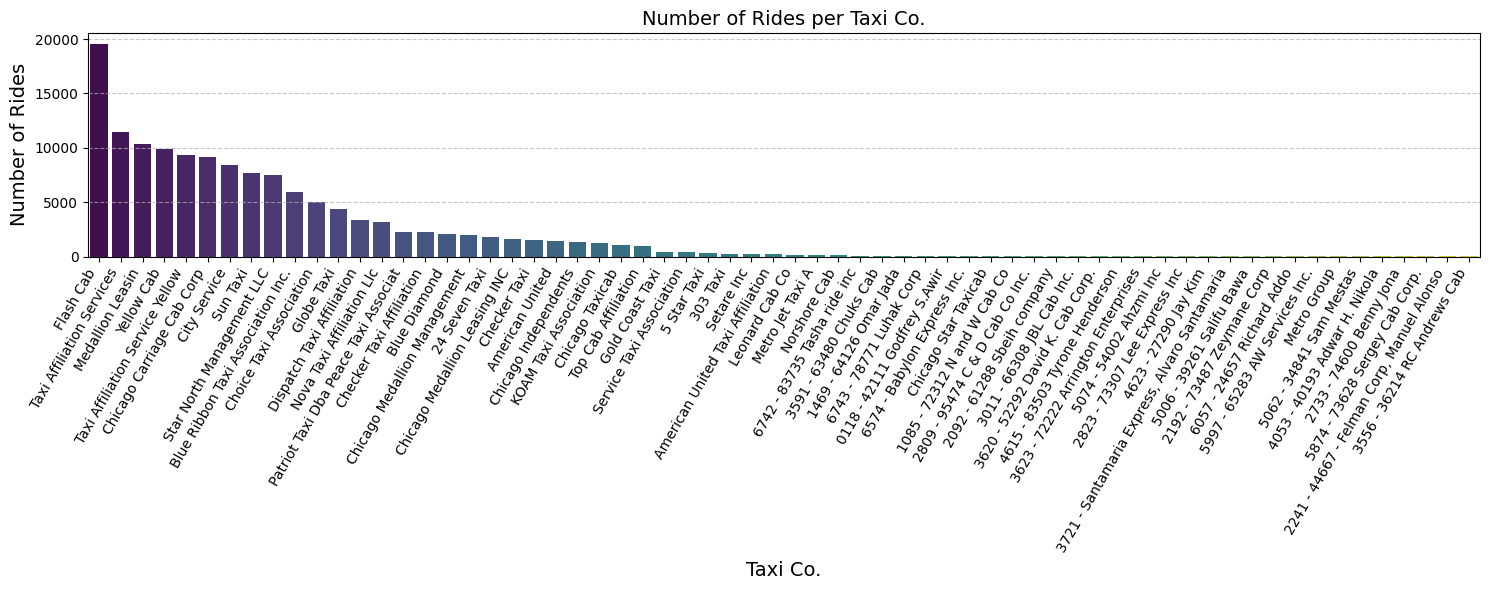

In [12]:
#1st Graph: Taxi Companies vs. Number of Rides
plt.figure(figsize=(15,6))
sns.barplot(x="company_name", y="trips_amount", data=df1, palette="viridis")
plt.title("Number of Rides per Taxi Co.", fontsize=14)
plt.xlabel("Taxi Co.", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph demonstrates a highly uneven distribution of rides among taxi companies, with a small number of companies responsible for the vast majority of trips. Most companies operate on a much smaller scale. This points to strong market leaders and a competitive environment where the largest companies set the pace for the industry. The leading companies likely have competitive advantages: such as a larger fleet, better technology, or higher customer loyalty—that allow them to attract more riders. Smaller companies might find it challenging to compete directly with the top ones. They may need to focus on niche markets or differentiating their services to grow.

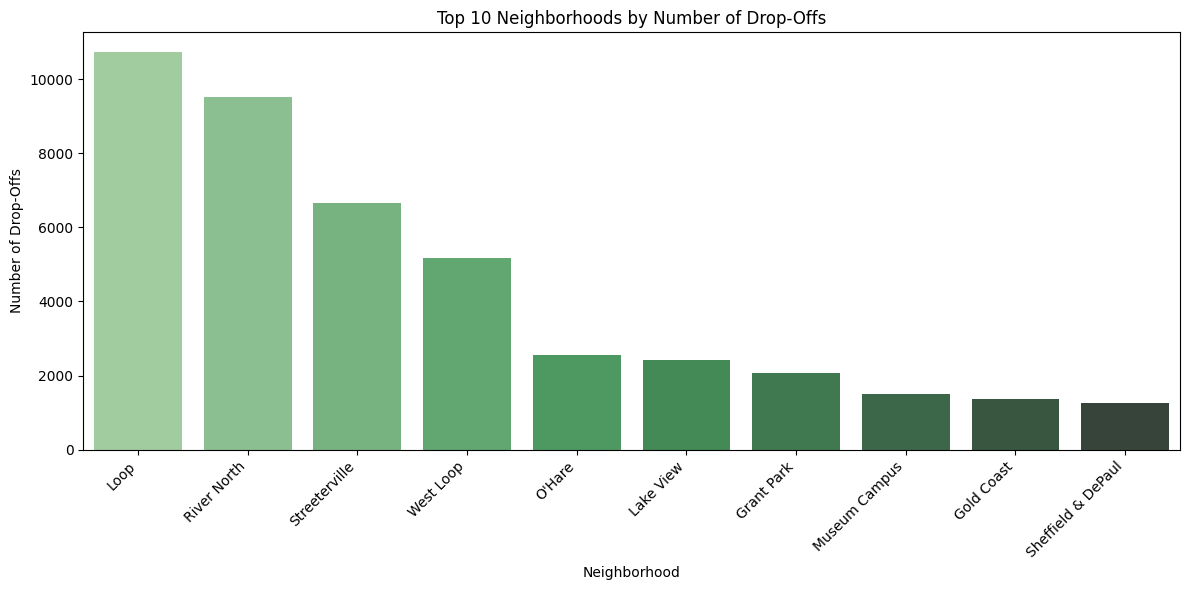

In [13]:
#Second Graph: Top 10 Neighborhoods

#Graph by neighborhood and sum drop-off's
neighborhoods = df2.groupby('dropoff_location_name')['average_trips'].sum()

#Sort and get Top 10 Neightborhoods
top_neighborhoods = neighborhoods.sort_values(ascending=False).head(10)

#Plot Graph
plt.figure(figsize=(12,6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="Greens_d")
plt.title('Top 10 Neighborhoods by Number of Drop-Offs')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Drop-Offs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph reveals that Chicago’s Loop, River North, and Streeterville are the most popular neighborhoods for taxi drop-offs, highlighting the importance of business, entertainment, and tourism in driving taxi demand. The Loop’s dominance reflects its role as Chicago’s central business district, attracting commuters, tourists, and business travelers. High drop-offs in River North and Streeterville indicate strong demand for taxis near restaurants, bars, hotels, and entertainment venues. O’Hare being in the top 10 is expected, as airports are major sources and destinations for taxi rides.

**Testing hypotheses**
Null Hypothesis (H₀):
The average duration of rides from the Loop to O'Hare International Airport on rainy(bad) Saturdays is equal to the average duration on non-rainy Saturdays.

Alternative Hypothesis (H₁):
The average duration of rides from the Loop to O'Hare International Airport on rainy(bad) Saturdays is different from (or greater than) the average duration on non-rainy Saturdays.

In [14]:
from scipy.stats import ttest_ind

# Load data
df = pd.read_csv('moved_project_sql_result_07.csv')

# Convert start_ts to datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Filter for Saturdays only
df['weekday'] = df['start_ts'].dt.day_name()
saturdays = df[df['weekday'] == 'Saturday']

# Filter for "rainy" and "non-rainy" Saturdays based on 'Bad' weather (Figuring that 'Bad' means 'Rainy' and 'Good' means 'Non-Rainy')
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']
non_rainy_saturdays = saturdays[saturdays['weather_conditions'] != 'Bad']

# Extract ride durations
rainy_durations = rainy_saturdays['duration_seconds']
non_rainy_durations = non_rainy_saturdays['duration_seconds']

# Remove any missing or zero durations
rainy_durations = rainy_durations[rainy_durations > 0]
non_rainy_durations = non_rainy_durations[non_rainy_durations > 0]

# Print counts for confirmation
print("Total Saturdays:", len(saturdays))
print("Rainy Saturdays:", len(rainy_saturdays))
print("Non-Rainy Saturdays:", len(non_rainy_saturdays))
print("Rainy Saturday weather values:", rainy_saturdays['weather_conditions'].unique())

Total Saturdays: 1068
Rainy Saturdays: 180
Non-Rainy Saturdays: 888
Rainy Saturday weather values: ['Bad']


In [15]:
from scipy.stats import ttest_ind

# Calculate group means
mean_rainy = rainy_durations.mean()
mean_non_rainy = non_rainy_durations.mean()

print('Mean duration (Rainy Saturdays):', mean_rainy)
print('Mean duration (Non-Rainy Saturdays):', mean_non_rainy)

# Perform Welch's t-test (unequal variances)
t_stat, p_val = ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Set significance level
alpha = 0.05
if p_val < alpha:
    print("Result: Statistically significant difference in average ride duration on rainy Saturdays.")
else:
    print("Result: No statistically significant difference in average ride duration on rainy Saturdays.")

Mean duration (Rainy Saturdays): 2427.2055555555557
Mean duration (Non-Rainy Saturdays): 2013.2789115646258
t-statistic: 6.979328835930791
p-value: 2.4173590471585584e-11
Result: Statistically significant difference in average ride duration on rainy Saturdays.


**Significance Level** I chose a significance level ((\alpha)) of 0.05, which is a commonly used threshold in hypothesis testing. This means I was willing to accept a 5% chance of a Type I error (falsely rejecting the null hypothesis).
**Criterion/Test Used** I used Welch’s t-test (independent two-sample t-test with unequal variances) because:
I am comparing the means of two independent groups ("Bad" vs "Good" weather on Saturdays). "Bad" being the "Rainy" Saturdays.
Welch’s t-test does not assume equal variances, making it more robust when group sizes or variances differ.
The test criterion:
If the p-value is less than 0.05, I reject the null hypothesis.
**Results** Since the p-value is much less than 0.05, I reject the null hypothesis.

**Conclusion:**
There is a statistically significant difference in the average duration of rides on rainy "bad" Saturdays compared to non-rainy "good" Saturdays. On average, rides take longer when the weather is bad.